# Regressão linear

Regressão é a tarefa de encontrar uma função que aproxima um conjunto de dados, de forma que a variável objetivo é contínua (ou seja, a função tem como imagem $\mathbb{R}$). Neste exemplo, trataremos de um conjunto de dados onde a variável objetivo é o preço mediano das casas em um determinado bairro, e temos acesso a uma única variável preditora que é a porcentagem da população daquele bairro que é considerada de baixa renda.

Intuitivamente, sabemos que bairros com maior concentração de pessoas de baixa renda tem algum tipo de relação com um menor preço das casas naquele bairro.

Começaremos olhando para os nossos dados para ter uma ideia geral do problema que estamos lidando. A biblioteca `pandas` nos dá acesso a funções de tratamento de dados tabulares. Utilizamos essa biblioteca para importar nossos dados, olhar algumas estatísticas básicas e visualizar os dados.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_boston

%matplotlib inline

In [37]:
boston = load_boston()

In [38]:
dados = pd.DataFrame({'baixa renda': boston.data[:, -1],
                      'preço': boston.target})
dados.head()

,baixa renda,preço
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
dados = dados.sort_values(by='baixa renda')
dados.head()

,baixa renda,preço
161,1.73,50.0
162,1.92,50.0
40,1.98,34.9
232,2.47,41.7
192,2.87,36.4


In [15]:
dados.shape

(506, 2)

In [16]:
dados.describe()

,baixa renda,preço
count,506.000000,506.000000
mean,12.653063,22.532806
std,7.141062,9.197104
min,1.730000,5.000000
25%,6.950000,17.025000
50%,11.360000,21.200000
75%,16.955000,25.000000
max,37.970000,50.000000


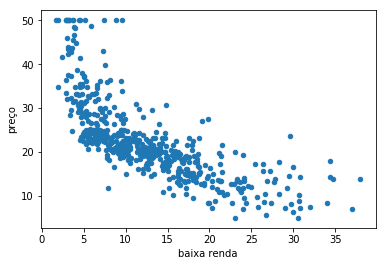

In [17]:
dados.plot.scatter('baixa renda', 'preço');

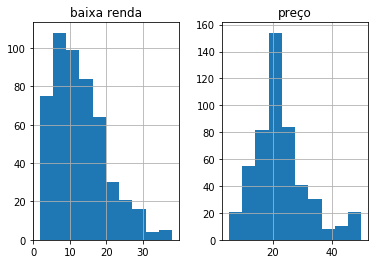

In [18]:
dados.hist();

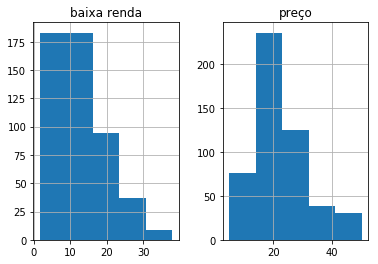

In [10]:
dados.hist(bins=5);

## Coeficiente de correlação

O coeficiente de correlação de Pearson, muitas vezes chamado somente de correlação ou de Pearson r, é uma estatística que calcula o quanto uma variável é linearmente dependente de outra. O valor varia entre -1 (indicando uma correlação perfeita negativa, ou seja, o aumento da variável independente causa uma redução na variável dependente) e 1 (similarmente uma correlação perfeita, mas positiva). O valor zero indica que não há correlação linear entre as variáveis.

Existem outros tipos de correlação para outros casos, mas o coeficiente de Pearson é utilizado para dependências lineares.

Em Python, temos a função de cálculo de correlação `pearsonr` dentro do pacote `scipy.stats`. A função retorna um par de números, sendo que o primeiro é o coeficiente de correlação (o segundo número é o p-valor, que ignoraremos).

In [24]:
pearsonr(dados['baixa renda'], dados['preço'])[0]

-0.7376627261740147

In [25]:
renda = dados['baixa renda'].values.reshape(-1, 1)
preco = dados['preço'].values.reshape(-1, 1)

## Algoritmos de regressão

Como estamos interessados em regressão linear, os algoritmos utilizados retornarão uma reta, geralmente representada pela equação $y = mx + y_0$, onde estamos interessados em encontrar os valores $m$ e $y_0$. Na biblioteca `sklearn`, esses valores são chamados de `coef_` e `intercept_`.

## Regressão linear simples

In [26]:
regressor = LinearRegression()
regressor.fit(renda, preco)
y0 = regressor.intercept_
m = regressor.coef_[0]
y0, m

(array([34.55384088]), array([-0.95004935]))

array([[34.55384088]])

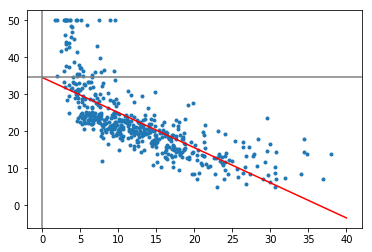

In [27]:
plt.scatter(renda, preco, marker='.')

x = np.linspace(0, 40, 2).reshape(-1, 1)
plt.plot(x, regressor.predict(x), c='r')

plt.axvline(0, c='gray')
f0 = regressor.predict(np.array([0]).reshape(-1, 1))
plt.axhline(f0, c='gray')

f0

### Avaliando uma regressão

Existem diversos cálculos para avaliar a qualidade de uma regressão. Comumente utilizados temos o fator $R^2$, a média dos erros absolutos, e a média dos erros quadrados. Todas essas funções estão disponíveis no módulo `sklearn.metrics`.

O fator $R^2$, chamado de coeficiente de determinação, pode ser visto como quanto uma variável tem poder de predição sobre a outra. Para o caso da regressão linear, o $R^2$ é equivalente ao quadrado do coeficiente de Pearson.

Utilizaremos a função `predict` do nosso regressor para encontrar os valores de `y` da reta nos pontos específicos onde há exemplos.

In [28]:
predito = regressor.predict(renda)
r2_score(preco, predito)

0.5441462975864797

In [29]:
pearsonr(preco, renda)[0] ** 2

array([0.5441463])

In [30]:
mean_absolute_error(preco, predito)

4.505281166250567

In [33]:
mean_squared_error(preco, predito)

38.48296722989415

## Regressão linear com penalidade L1 (Lasso)

Outros algoritmo comuns para regressão são Lasso e Ridge, que utilizam as penalidades L1 e L2, respectivamente, para regularizar os dados. Também existe o Elastic Net, que combina as duas penalidades.

Esse tipo de regularização fazem com que valores muito fora do comum (_outliers_) sejam menos considerados, e os coeficientes tendem a ficar mais simples. Essa regularização é muito comum para quando há mais de uma variável preditora, mas utilizaremos aqui para mostrar o funcionamento.

O algoritmo Lasso utiliza um hiper-parâmetro $\alpha$ (alfa), com valor padrão 1.0, que determina quanto de penalidade deve ser aplicado. Quando esse valor tende a zero, o algoritmo se aproxima do algoritmo de regressão simples (mas não é recomendado fazer isso pois há instabilidade numérica).

[34.30522477] [-0.93040066]


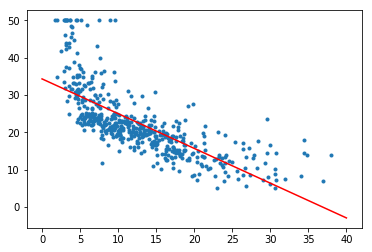

In [34]:
regressor = Lasso(alpha=1.0).fit(renda, preco)
y0 = regressor.intercept_
m = regressor.coef_
print(y0, m)

x = np.linspace(0, 40, 2).reshape(-1, 1)
plt.scatter(renda, preco, marker='.')
plt.plot(x, regressor.predict(x), color='red');

In [35]:
predito = regressor.predict(renda)
print('R^2', r2_score(preco, predito))
print('MAE', mean_absolute_error(preco, predito))
print('MSE', mean_squared_error(preco, predito))

R^2 0.5439135471381261
MAE 4.497442134682039
MSE 38.502615919439314


Como podemos ver, o coeficiente mudou muito pouco, de -0.95 para -0.93. Os valores de erro também continuam praticamente iguais. Tentemos agora com valores diferentes de $\alpha$.


    y0: [34.52897927]
    m: -0.9480844848034748
    R^2: 0.5441439700819961
    Erro absoluto: 4.504320887620784
    Erro quadrado: 38.483163716789605
    

    y0: [34.42953282]
    m: -0.9402250089854104
    R^2: 0.5440881099743914
    Erro absoluto: 4.500807587758577
    Erro quadrado: 38.48787940228044
    

    y0: [34.35494799]
    m: -0.9343304021218622
    R^2: 0.5439973372995335
    Erro absoluto: 4.498549346886957
    Erro quadrado: 38.49554239120306
    

    y0: [34.18091671]
    m: -0.9205763194402496
    R^2: 0.5436226090776842
    Erro absoluto: 4.494917885692384
    Erro quadrado: 38.527176781370756
    


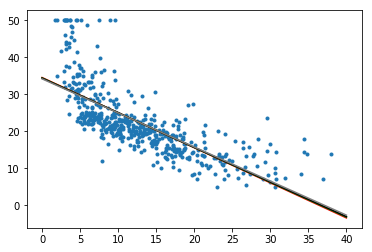

In [39]:
cores = ['red', 'green', 'black', 'gray']
alfas = [0.1, 0.5, 0.8, 1.5]

plt.scatter(renda, preco, marker='.')

for cor, alfa in zip(cores, alfas):
    regressor = Lasso(alpha=alfa).fit(renda, preco)
    y0 = regressor.intercept_
    m = regressor.coef_[0]
    
    predito = regressor.predict(renda)
    r2 = r2_score(preco, predito)
    mae = mean_absolute_error(preco, predito)
    mse = mean_squared_error(preco, predito)
    print(f'''
    y0: {y0}
    m: {m}
    R^2: {r2}
    Erro absoluto: {mae}
    Erro quadrado: {mse}
    ''')
    
    plt.plot(x, regressor.predict(x), color=cor)

Alterações em $\alpha$ causam poucas variações da reta gerada.

É importante notar que as avaliações de algoritmos de aprendizado geralmente não são aplicadas no mesmo conjunto de dados utilizado para treinar o algoritmo, como estamos fazendo aqui. Mais para frente utilizaremos avaliações menos ingênuas.

## Alteração de atributos / atributos não-lineares

Um problema comum em ciência de dados é encontrar os atributos corretos. Muitas vezes, podemos aplicar funções matemáticas para alterar ou combinar os atributos que temos em mãos para encontrar modelos superiores.

Podemos pensar, existe algum outro tipo de função que se adequaria melhor aos nossos dados do que uma reta? Para quem está acostumado com a função $\log$, a distribuição dos nossos dados se assemelha um pouco com a função $\log$ aplicada no inverso do número, como podemos visualizar abaixo.

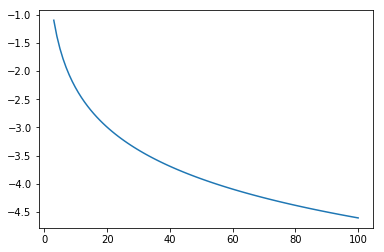

In [40]:
x = np.linspace(3, 100, 100)
y = np.log(1 / x)
plt.plot(x, y);

Como podemos fazer para ajustar uma curva logarítmica aos nossos dados? A resposta é que não precisamos! Basta alterar os atributos para que estejam em espaço log, e então aplicar uma regressão linear.

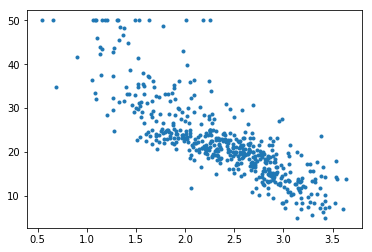

In [41]:
plt.scatter(np.log(renda), preco, marker='.');

In [42]:
pearsonr(np.log(renda), preco)[0]

array([-0.81544235])

Como podemos ver, o coeficiente de correlação foi de -0.737 para -0.815, indicando que agora há uma relação _linear_ mais forte entre as variáveis.


    y0: [51.46680727]
    m: -12.203469436350254
    R^2: 0.6646175063578895
    Erro absoluto: 3.8762866919858263
    Erro quadrado: 28.31284125581498
    

    y0: [48.83501017]
    m: -11.093458569342722
    R^2: 0.656728261844776
    Erro absoluto: 3.8900689247235403
    Erro quadrado: 28.978847776019492
    

    y0: [46.86116235]
    m: -10.260950419087074
    R^2: 0.6439082395109662
    Erro absoluto: 3.934638378804883
    Erro quadrado: 30.06110837135184
    

    y0: [45.5452638]
    m: -9.705944985583308
    R^2: 0.6320743727412957
    Erro absoluto: 3.9778538162425177
    Erro quadrado: 31.060118151658617
    

    y0: [42.25551742]
    m: -8.318431401823894
    R^2: 0.5909845575688288
    Erro absoluto: 4.137796075271056
    Erro quadrado: 34.52890211105715
    


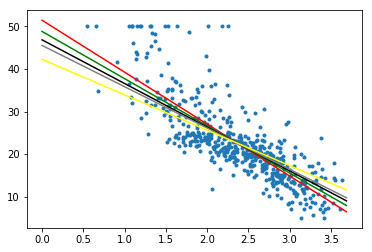

In [43]:
cores = ['red', 'green', 'black', 'gray', 'yellow']
alfas = [0.1, 0.5, 0.8, 1.0, 1.5]

plt.scatter(np.log(renda), preco, marker='.')

for cor, alfa in zip(cores, alfas):
    regressor = Lasso(alpha=alfa).fit(np.log(renda), preco)
    y0 = regressor.intercept_
    m = regressor.coef_[0]
    
    predito = regressor.predict(np.log(renda))
    r2 = r2_score(preco, predito)
    mae = mean_absolute_error(preco, predito)
    mse = mean_squared_error(preco, predito)
    print(f'''
    y0: {y0}
    m: {m}
    R^2: {r2}
    Erro absoluto: {mae}
    Erro quadrado: {mse}
    ''')
    
    x = np.linspace(0, np.log(40), 200).reshape(-1, 1)
    plt.plot(x, regressor.predict(x), color=cor)

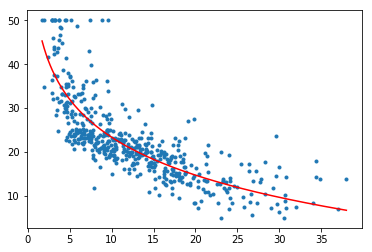

In [44]:
regressor = LinearRegression().fit(np.log(renda), preco)
x = np.linspace(renda.min(), renda.max(), 300).reshape(-1, 1)
y = regressor.predict(np.log(x))

plt.scatter(renda, preco, marker='.')
plt.plot(x, y, c='r');

## Regressão polinomial

Contraintuitivamente, regressão polinomial é só um caso específico de regressão linear. A regressão linear pode ser, e geralmente é feita, utilizando mais de uma variável preditora, permitindo modelos mais complexos. Nesse caso, a equação da reta em múltiplas dimensões passa a ser $y = y_0 + m_0x_0 + m_1x_1 + m_2x_2 + \ldots + m_nx_n$. Os valores de $x$ são os valores observados das variáveis; o algoritmo de regressão é responsável por achar o valor $y_0$ e todos os valores dos coeficientes $m$.

Consideremos agora que temos somente uma variável preditora, como no conjunto de dados que estamos tratando. Podemos modificar a variável preditora como fizemos com a operação $\log$, gerando várias variáveis que podem ser usadas em uma regressão linear multidimensional, como acima. No caso específico que modificamos nossa variável preditora $x$ utilizando suas potências, ficamos com as variáveis preditoras $x, x^2, x^3, ..., x^n$, para um determinado $n$ que escolhermos. Assim, a equação da "reta" ajustada passa a ser $y = y_0 + m_0x + m_1x^2 + m_2x^3 + ... + m_nx^{n+1}$, um polinômio de grau $n+1$.

Vamos começar ajustando um polinômio de grau 2 (uma parábola) aos nossos dados, e comparar com um polinômio de grau 14.

Trivia: o nome regressão linear se refere a uma combinação linear entre as variáveis, e não porque se ajusta uma linha. Por isso a regressão polinomial é uma regressão linear. A equação da regressão polinomial no primeiro parágrafo dessa célula também pode ser escrita como $y - y_0 = \vec{m} \cdot \vec{x} = \sum m_i x_i$, onde o lado direito da equação é a forma canônica da combinação linear. Mesmo que as variáveis sejam alteradas por diversas funções não-lineares, como fizemos com $\log$ anteriormente, a combinação entre os atributos é sempre feita nessa forma linear, multiplicando os coeficientes pelos valores de atributos, e somando o resultado. No caso polinomial, temos $x_i = x^i$.

[42.86200733] [[-2.3328211   0.04354689]]
0.6407168971636612 4.042750030508295 30.330520075853713


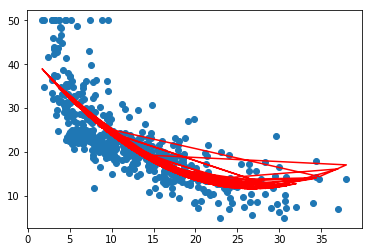

In [53]:
x1 = renda
x2 = renda ** 2
x = np.hstack([x1, x2])
regressor = LinearRegression().fit(x, preco)
y0 = regressor.intercept_
m = regressor.coef_
print(y0, m)

curva = regressor.predict(x)
print(r2_score(preco, curva), mean_absolute_error(preco, curva), mean_squared_error(preco, curva))

plt.scatter(renda, preco)
plt.plot(renda, curva, c='red');

[[-5.91977860e-14 -4.25344953e-10 -1.39487489e-11 -1.46280246e-10
  -1.44814744e-09 -1.20507287e-08 -7.60419750e-08 -2.74351002e-07
   5.66824695e-08 -4.76107739e-09  2.11175591e-10 -5.22835908e-12
   6.85482212e-14 -3.71910590e-16]]
0.4958010058030722 4.795732015957237 42.564255304489734


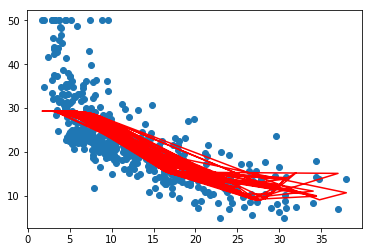

In [54]:
x_l = [renda]
for potencia in range(2, 15):
    x_l.append(renda ** potencia)

x = np.hstack(x_l)
regressor = LinearRegression().fit(x, preco)
print(regressor.coef_)
curva = regressor.predict(x)
print(r2_score(preco, curva), mean_absolute_error(preco, curva), mean_squared_error(preco, curva))
plt.scatter(renda, preco)
plt.plot(renda, curva, c='red');

Apesar do polinômio de grau 14 ser um modelo mais complexo, seu erro é maior que os polinômios de grau 1 (reta) e 2. Isso acontece porque o modelo está _superajustado_ (_overfitted_) aos dados representados, e não generaliza a tendência dos dados. Nesses casos, podemos utilizar as penalidades L1 e L2 como discutidos anteriormente.

(Pode ser que um aviso de `ConvergenceWarning` seja mostrado; não é um erro do programa, mas sim um aviso de que o resultado pode ser numericamente instável devido à alta dimensão).

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6634133958501064 28.414491730445008
0.6544767119395405 29.16892261968293
0.6453759316195102 29.937206454974643
0.6403834140197537 30.358672574847933
0.6218795514961604 31.920760436264395


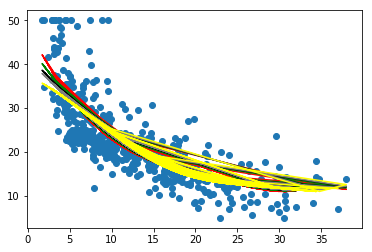

In [55]:
cores = ['red', 'green', 'black', 'gray', 'yellow']
alfas = [0.1, 0.5, 0.8, 1.0, 1.5]

plt.scatter(renda, preco)

for cor, alfa in zip(cores, alfas):
    regressor = Lasso(alpha=alfa)
    regressor.fit(x, preco)
    
    predito = regressor.predict(x)
    print(r2_score(preco, predito), mean_squared_error(preco, predito))
    
    graphx = np.linspace(0, np.log(40), 200).reshape(-1, 1)
    plt.plot(renda, predito, color=cor)

Apesar da curva gerada ser um polinômio de grau 14, sua aparência é muito similar à parabola que geramos anteriormente. Dessa forma, o modelo consegue representar curvas mais complexas, mas tem uma tendência a utilizar formas mais simples, generalizando a tendência dos dados.